In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import copy

# MNIST dataset loading
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                        train=True, 
                                        transform=transforms.ToTensor(),  
                                        download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                       train=False, 
                                       transform=transforms.ToTensor())

print("Train set size:", len(train_data), "\nTest set size:", len(test_data))

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=600, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=100, 
                                          shuffle=False)


Train set size: 60000 
Test set size: 10000


In [10]:
# Define multiple models with varying hidden layers
class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.layer1 = nn.Linear(784, 50)
        self.layer2 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.layer1 = nn.Linear(784, 100)
        self.layer2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelC(nn.Module):
    def __init__(self):
        super(ModelC, self).__init__()
        self.layer1 = nn.Linear(784, 250)
        self.layer2 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelD(nn.Module):
    def __init__(self):
        super(ModelD, self).__init__()
        self.layer1 = nn.Linear(784, 500)
        self.layer2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelE(nn.Module):
    def __init__(self):
        super(ModelE, self).__init__()
        self.layer1 = nn.Linear(784, 550)
        self.layer2 = nn.Linear(550, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelF(nn.Module):
    def __init__(self):
        super(ModelF, self).__init__()
        self.layer1 = nn.Linear(784, 750)
        self.layer2 = nn.Linear(750, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelG(nn.Module):
    def __init__(self):
        super(ModelG, self).__init__()
        self.layer1 = nn.Linear(784, 1000)
        self.layer2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelH(nn.Module):
    def __init__(self):
        super(ModelH, self).__init__()
        self.layer1 = nn.Linear(784, 1050)
        self.layer2 = nn.Linear(1050, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelI(nn.Module):
    def __init__(self):
        super(ModelI, self).__init__()
        self.layer1 = nn.Linear(784, 1500)
        self.layer2 = nn.Linear(1500, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

class ModelJ(nn.Module):
    def __init__(self):
        super(ModelJ, self).__init__()
        self.layer1 = nn.Linear(784, 2000)
        self.layer2 = nn.Linear(2000, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.layer1(x))
        return self.layer2(x)

    

In [11]:
# Training function
def train_model(model, epochs):
    model.train()
    steps = len(train_loader)
    train_loss = []
    train_accuracy = []
    epochs_completed = []
    stop_training = False
    epoch = 0

    while not stop_training:
        epoch += 1
        correct_preds = 0
        total_samples = 0
        loss_sum = 0

        for i, (inputs, targets) in enumerate(train_loader):
            outputs = model(inputs)
            loss = loss_func(outputs, targets)
            loss_sum += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predictions = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_preds += (predictions == targets).sum().item()
            accuracy = 100.0 * correct_preds / total_samples

            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch}/{epochs}], Step [{i+1}/{steps}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%', end='\r', flush=True)
                epochs_completed.append(epoch)
                train_loss.append(loss.item())
                train_accuracy.append(accuracy)

            if epoch == epochs:
                print("Max Epoch Reached")
                stop_training = True
            elif epoch > 5 and train_loss[-1] < 0.001 and abs(train_loss[-3] - train_loss[-2]) < 1.0e-05 and abs(train_loss[-2] - train_loss[-1]) < 1.0e-05:
                print("Training Converged at Loss:", train_loss[-1])
                stop_training = False
        print(f'Epoch {epoch} Avg Loss: {loss_sum / steps}', end='\r', flush=True)

    return epochs_completed, train_loss, train_accuracy


In [12]:
# Testing function
def evaluate_model(model):
    model.eval()
    total_correct = 0
    total_samples = 0
    test_loss = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = loss_func(outputs, targets)
            test_loss += loss
            _, predicted = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            total_correct += (predicted == targets).sum().item()

    avg_loss = test_loss / len(test_loader)
    accuracy = 100.0 * total_correct / total_samples

    print(f"Model: {model._get_name()}, Test Accuracy: {accuracy:.2f}%, Test Loss: {avg_loss:.4f}")
    return accuracy, avg_loss



In [13]:
# Set up and evaluate all models
model_classes = [ModelA, ModelB, ModelC, ModelD, ModelE, ModelF, ModelG, ModelH, ModelI, ModelJ]
train_losses = {}
train_acc = {}
test_losses = {}
test_acc = {}
model_params = {}

for cls in model_classes:
    instance = cls()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(instance.parameters(), lr=0.001)

    param_count = sum(p.numel() for p in instance.parameters())
    print(f"Total parameters in {cls.__name__}: {param_count}")

    epochs_completed, losses, accuracy = train_model(instance, 10)
    test_accuracy, test_loss = evaluate_model(instance)

    train_losses[cls.__name__] = losses
    train_acc[cls.__name__] = accuracy
    test_losses[cls.__name__] = test_loss
    test_acc[cls.__name__] = test_accuracy
    model_params[cls.__name__] = param_count

Total parameters in ModelA: 39760
Max Epoch Reached 0.17372641846537590.1562, Accuracy: 95.16%
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max E

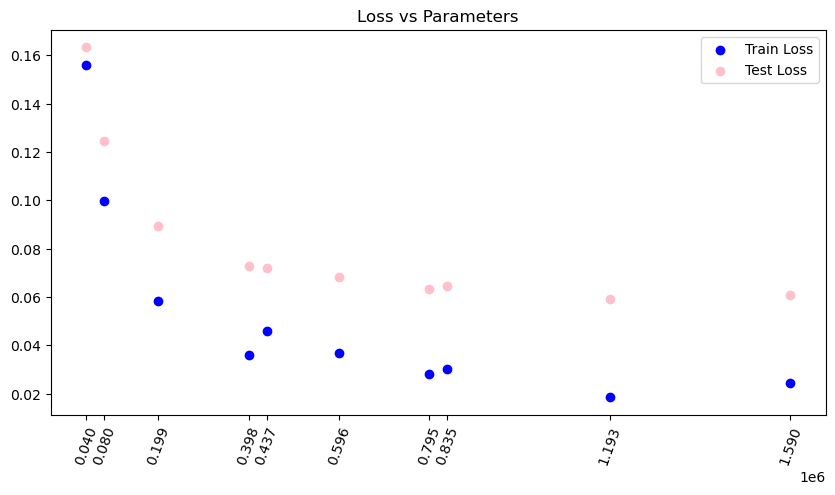

In [14]:
# Plot loss vs parameters
plt.figure(figsize=(10, 5))
train_loss_vals = [min(train_losses[m]) for m in train_losses]
test_loss_vals = [test_losses[m] for m in test_losses]
plt.scatter(model_params.values(), train_loss_vals, color='blue')
plt.scatter(model_params.values(), test_loss_vals, color='pink')
plt.xticks(list(model_params.values()), rotation=70)
plt.legend(['Train Loss', 'Test Loss'])
plt.title("Loss vs Parameters")
plt.show()

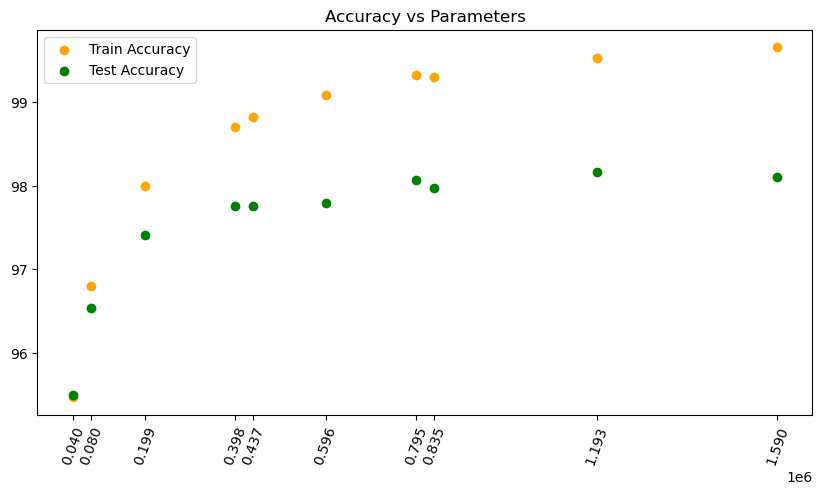

In [15]:
# Plot accuracy vs parameters
plt.figure(figsize=(10, 5))
train_acc_vals = [max(train_acc[m]) for m in train_acc]
test_acc_vals = [test_acc[m] for m in test_acc]
plt.scatter(model_params.values(), train_acc_vals, color='orange')
plt.scatter(model_params.values(), test_acc_vals, color='green')
plt.xticks(list(model_params.values()), rotation=70)
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.title("Accuracy vs Parameters")
plt.show()